Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [3]:
import pandas as pd

In [106]:
data = pd.read_csv('taxi.csv')
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [107]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

In [109]:
data[data['duration_min'] < 0]

# очень много ячеек с пустыми дистанциям и временем подачи

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.0,-1.0,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.0,-1.0,Economy,private,1
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.0,-1.0,Standard,business,1
19,533917,5,8,6080,596531,55.913718,37.401395,55.921554,37.403505,-1.0,-1.0,Standard,business,0
21,123897,4,12,6080,185909,55.766763,37.607275,55.772388,37.606330,-1.0,-1.0,Standard,business,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,1088748,1,2,2442,458538,55.961383,37.413560,55.962322,37.407117,-1.0,-1.0,Standard,private,0
99981,397745,1,23,2442,383092,55.961397,37.413560,55.962322,37.407117,-1.0,-1.0,Standard,private,0
99987,871592,4,23,2442,802677,55.961121,37.414019,55.961995,37.406355,-1.0,-1.0,Standard,private,0
99991,619039,6,23,2442,323136,55.961239,37.413497,55.962322,37.407117,-1.0,-1.0,Standard,private,0


In [94]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [110]:
# определим дистанцию по известным координатам, округлим до 100 м
from geopy.distance import geodesic

def distance(row):
    point1 = (row['driver_latitude'], row['driver_longitude'])
    point2 = (row['origin_order_latitude'], row['origin_order_longitude'])
    if -1 not in (point1 + point2):
        return geodesic(point1, point2, ellipsoid='WGS-84').m//100
    else:
        return -1

In [111]:
data['true_dist'] = data.apply(distance, axis = 1)
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,true_dist
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0,13.0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,34.0
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,4.0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1,6.0
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,10.0


In [112]:
data[(data['true_dist'] < 70000) & (data['true_dist'] >= 0)].describe()
# видим, что неопределившихся дистанций на самом деле немного, убираем их и выброс в 70000+


,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response,true_dist
count,9.984600e+04,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000
mean,5.661606e+05,3.160087,13.826633,3445.159676,460917.356649,55.780883,37.546631,55.780195,37.546311,18.411756,23.159030,0.491757,9.437454
std,3.259388e+05,2.054477,7.308449,2038.548277,266050.549822,0.153851,0.157053,0.156106,0.159887,41.150869,33.901266,0.499935,9.487575
min,4.000000e+00,0.000000,0.000000,14.000000,18.000000,55.327636,36.984771,55.327917,36.994072,-1.000000,-1.000000,0.000000,0.000000
25%,2.855075e+05,1.000000,8.000000,1421.000000,229222.250000,55.709285,37.413497,55.708502,37.407117,-1.000000,-1.000000,0.000000,4.000000
50%,5.655655e+05,3.000000,16.000000,3506.000000,462534.000000,55.773085,37.533874,55.772734,37.532189,10.441500,19.750000,0.000000,6.000000
75%,8.486678e+05,5.000000,20.000000,5242.000000,690894.000000,55.960697,37.624235,55.962035,37.624145,30.694750,37.883000,1.000000,13.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.000000,56.174097,38.280547,56.172361,38.243608,5234.283000,3958.283000,1.000000,223.000000


In [113]:
data = data[(data['true_dist'] < 70000) & (data['true_dist'] >= 0)]

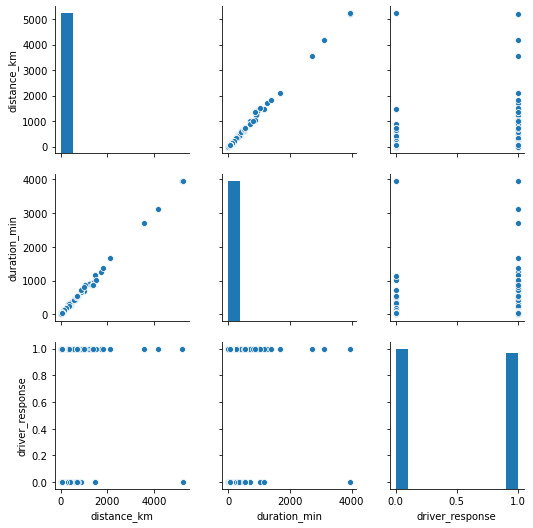

In [114]:
import seaborn as sns
sns.pairplot(data[['distance_km', 'duration_min', 'driver_response']])


In [115]:
'''Видим, что между временем и расстоянием корелляция линейная, поэтому убираем колонки время и расстояние,
оставив только новое вычисленное расстояние.

Также убираем ставшие ненужными колонки с координатами
(можно было бы еще вывести параметр "к центру/из центра города", но в рамкаж учебной задачи пока пропущу)

order_gk и offer_gk тоже убираю, так как они уникальны и от них ничего не зависит, а вот driver_gk - оставлю, 
так как разные водители могут оп разному себя вести 

'''

data.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 
          'origin_order_longitude', 'distance_km', 'duration_min', 'order_gk' ,'offer_gk'], axis = 1, inplace = True)

data.head()

,weekday_key,hour_key,driver_gk,offer_class_group,ride_type_desc,driver_response,true_dist
0,5,20,6080,Economy,private,0,13.0
1,5,14,6080,Standard,private,1,34.0
2,6,14,6080,Economy,private,0,4.0
3,2,6,6080,Economy,private,1,6.0
4,4,16,6080,Economy,private,1,10.0


In [116]:
data.offer_class_group.unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

In [117]:
data.ride_type_desc.unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data.offer_class_group)
data['type'] = le.fit_transform(data.ride_type_desc)
data.drop(['offer_class_group', 'ride_type_desc'], axis = 1, inplace = True)
data.head()

,weekday_key,hour_key,driver_gk,driver_response,true_dist,class,type
0,5,20,6080,0,13.0,1,3
1,5,14,6080,1,34.0,4,3
2,6,14,6080,0,4.0,1,3
3,2,6,6080,1,6.0,1,3
4,4,16,6080,1,10.0,1,3


In [119]:
# данные стали пригодны к использованию, построим на них модель
data.describe()

,weekday_key,hour_key,driver_gk,driver_response,true_dist,class,type
count,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000
mean,3.160087,13.826633,3445.159676,0.491757,9.437454,2.491277,2.910272
std,2.054477,7.308449,2038.548277,0.499935,9.487575,1.553203,0.297201
min,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,1421.000000,0.000000,4.000000,1.000000,3.000000
50%,3.000000,16.000000,3506.000000,0.000000,6.000000,2.000000,3.000000
75%,5.000000,20.000000,5242.000000,1.000000,13.000000,4.000000,3.000000
max,6.000000,23.000000,6806.000000,1.000000,223.000000,8.000000,3.000000


In [123]:
x = data.drop('driver_response', axis = 1)
y = data.driver_response

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [125]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
from sklearn.metrics import classification_report
model_pred = model.predict(x_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     10205
           1       0.75      0.78      0.77      9765

    accuracy                           0.77     19970
   macro avg       0.77      0.77      0.77     19970
weighted avg       0.77      0.77      0.77     19970



In [128]:
from sklearn.ensemble import GradientBoostingRegressor as GDBSklearn
modelb=GDBSklearn()
modelb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [136]:
a = modelb.predict(x_test)
b = []
for x in a:
    if x > 0.5:
        b.append(1)
    else:
        b.append(0)
        
print(classification_report(y_test, b))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73     10205
           1       0.70      0.81      0.75      9765

    accuracy                           0.74     19970
   macro avg       0.74      0.74      0.74     19970
weighted avg       0.75      0.74      0.74     19970

